In [35]:
import wandb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [36]:
wandb.login() # This should work automatically after the first time. For the first time you will need an API key.
'''
Initiating a run:
project: The name of the project. Needs to be common between group members.
entity: The name of the group. ce8-840
name: The name of the run. Should be a good descriptor of the contents.
'''
#wandb.init(project="avs8-840-deep-learning-mini-project", entity='ce8-840', name='test_exploration')
wandb.init(project="test_2", entity='ce8-840', name='test_exploration2')

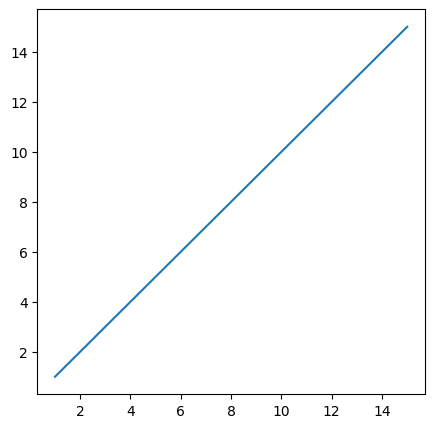

In [37]:
# Logging a figure
fig = plt.figure(figsize=(5,5))
plt.plot(np.linspace(1,15), np.linspace(1,15))
plt.show()
wandb.log({'Image_name' : wandb.Image(fig)})

# Logging parameters as a dictionary
wandb.log({'Key': 'Value'})

In [38]:
DF = pd.read_csv("dataset/metadata_compiled.csv")

In [39]:
DF2 = DF["status"].value_counts()
#wandb.run.log({"Status_class_dist": wandb.Image(saveDir)})
data = [[label, val] for (label, val) in zip(DF2.keys(), DF2.values)]
table = wandb.Table(data=data, columns = ["Class", "#Samples"])
wandb.log({"Status_class_dict_table": table})
wandb.log({"Status_class_dist_plot" : wandb.plot.bar(table, "Class", "#Samples",
                            title="Class distribution of status label")})

In [40]:
DF2 = DF.notna().sum(axis=0)
DF2 = DF2.to_frame(name="#Samples")
DF2.index.name = "Labels"
DF2 = DF2.reset_index()

table = wandb.Table(dataframe=DF2)

wandb.log({"Num_samples_per_labels_test3": table})
#wandb.log({"Num_samples_per_labels" : wandb.plot.bar(table, "Label", "Num_Samples",
#                            title="Number of samples that include each label")})
DF2

,Labels,#Samples
0,uuid,27550
1,datetime,27550
2,cough_detected,27550
3,SNR,27550
4,latitude,16084
5,longitude,16084
6,age,15218
7,gender,16224
8,respiratory_condition,16224
9,fever_muscle_pain,16224


In [41]:
DF2 = DF.notna().sum(axis=0)
#wandb.run.log({"Num_samples_per_labels": wandb.Image(saveDir)})
#data = [[label, val] for (label, val) in zip(DF2.keys(), DF2.values)]
#table = wandb.Table(data=data[:3], columns = ["Label", "Num_Samples"])

wandb.log({"Num_samples_per_labels_table": table})
wandb.log({"Num_samples_per_labels" : wandb.plot.bar(table, "Label", "Num_Samples",
                            title="Number of samples that include each label")})

In [42]:
#DF[DF.notna()["status"]]["cough_detected"].to_frame()
table = wandb.Table(dataframe=DF[DF.notna()["status"]]["cough_detected"].to_frame())
wandb.log({"cough_detected_dist_with_status_table": table})
#wandb.log({"cough_detected_dist_with_status_plot" : wandb.plot.histogram(table, "cough_detected",
#                            title="Histogram of cought probabilities")})

In [43]:
DF[DF.notna()["status"]]["cough_detected"].to_frame(name="Probabilities")
n_np, bins_np = np.histogram(DF[DF.notna()["status"]]["cough_detected"], 10)
print(n_np)
print(bins_np)

[1668  663  412  428  415  433  572  814 1343 9476]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [44]:
wandb.finish()

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Key,Value
